To answer questions, we need to break down a question into a hypothesis. Then we collect data to justify which hypothesis is likely to be true.

An example of this would be whether chocolate or vanilla is a more favored ice cream flavor.

Hypothesis is likely to be true?
is a cancer drug efectiveat helping patients?

Does it make the patient feel better, live longer etc

Most favoured icereme isvanilla. collect data to see if hishypothesis is supported by our data. how do we know this unless we talk to everyone? how do we make conclusions?

Hypothesis testing and confidence intervals allow for the use of sample data to draw conclusions about an entire population.

#### Examples

- The average height of all people in the world is less than or equal to 68 inches - Null
- The average height of all people in the world is different than 68 inches tall - Alternative
- The average height of all people in the world is less than 68 inches tall
- The impact of Drug A is on average the same as Drug B
- Drug A will on average have a larger impact than Drug B

**'Dyson Air Purifiers are the Best!'**
`Null`: Dyson Air Purifiers are not the best

`Alternative`: Dyson Air Purifiers are the best!

**"The average height of a human is smaller than or equal to 70 inches."**

`Null`: The average height of a human is not greater than 70 inches
`Alternative` The avergae height of human is greater than 70 inches

### Setting up hypothesis 1

In this lesson, you will learn how to set up and validate hypothesis tests properly.

Help business make better and more inforemed based decisions.

Translate a question into two competing, non-overlapping Hypothesis

`Null ($H_0$) hypothesis`
- condition believed to be true before we collect our data
- mathematically, usually states there is no effect or two groups are equal
- contains an equal sign of some kind - either =, $\leq$, or $\geq$

`Alternative ($H_1$) hypothesis`
- contains the opposition of the null - either $\neq$, $<$ or $>$
- what we want to prove to be true

Imagine the judicial system, Innocent? Guilty? we say 
**Innocent until proven guilty**
- Null hypothesis is every individual is innocent.
- Alternative is every individual is guilty.

We then collect data to see which hypothesis is supported.


### Setting up hypothesis 2

Suppose you create a new webpage layout and would like to know if the new page drives more traffic than the old one. Ask does the average webtraffic increase with the new web page as compared to the than the existing one?

Hope the new page is better. Whats the proof?

Null: average web trffic is the same or the old page is better.

$$ \mu_{old} \leq \mu_{new} $$

Alternative: average web traffic for new page is greater than existing page

$$ \mu_{old} < \mu_{new} $$

Then we collect data to see which hypothesis is supported.

Because we wanted to test if a new page was better than an existing page, we set that up in the alternative. Two indicators are that the null should hold the equality, and the statement we would like to be true should be in the alternative. Therefore, it would look like this:

### Types of Errors

Looking at the example of the judicial system again, two errors are likely:


- In the first error, a truly guilty person goes free, and the person is not punished for something they did do.

- A truly innocent person is found guilty and punished for something they did not do in the second error.

In your opinion, is one error worse than the other?

Truth: Innocent: Proven Guilty - Type 1 error Alternative is chose, but Null is true (denoted by $\alpha$) false positives
Truth: Guilty: proven inncoent - Type II error Null hypothesis chosen and alternative is true(denoted by $\beta$) false negatives

You should set up your null and alternative hypotheses so that the worse of your errors is the type I error. How much type I error do you want to make? we set up a threshold for this. In medical field, this is 1%, in research journals and other business applications threshold is 5%

### Common types of hypothesis testing

We always perorm hypothesis testing on population.
- Test mean or proportion of a population bein equal to some value.

Testing a population mean (One sample t-test).
Testing the difference in means (Two-sample t-test)
Testing the difference before and after some treatment on the same individual (Paired t-test)
Testing a population proportion (One sample z-test)
Testing the difference between population proportions (Two sample z-test)


When conducting hypothesis tests, we write our tests to understand population parameters. 

Which of the below represents how you would set up a hypothesis test to test if the average return of portfolio 1 $\mu_1$ is greater than the average return of portfolio 2 $\mu_2$?

$$H_{0}: \mu_1 \leq \mu_{2}; H_{1}: \mu_{1}>\mu_{2}$$

Once we set up our null hypothesis, we need to use data to prove which hypothesis is more likely to be true. There are two approaches to choosing our hypothesis

1) Using confidence interval where we simulate the sampling distribution of our statistics and seeing if our hypothesis is consistenct with what we observed in our sampling distribution

2) Simulate what we believe to be possible under the null, and then seeing if our data is consistent with that.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

df = pd.read_csv('coffee_dataset.csv')

#### Problem:

Suppose we want to know whether the average height for all coffee drinkers is greater than 70 inches

\begin{align}
H_0&: \mu \leq 70\\
H_{1}&: \mu > 70
\end{align}

where $\mu$ is mean of all coffee drinkers.

### Simulating with confidence interval

In [2]:
sample_df = df.sample(150)
bootstrap_sample = sample_df.sample(150, replace=True)
#bootstrap number of times and compute the mean height or each bootstrap sample
means = [] #empty vector of means that we will append each of our boostrap mean to
for _ in range(10000):
    bootsample = sample_df.sample(150,replace = True)
    boot_mean = bootsample['height'].mean()
    means.append(boot_mean)
    

We already know the statistics for our sample so we always test parameters during hypothesis testing. Using your confidence interval, you can simply look at if the interval falls in the null hypothesis space or in the alternative hypothesis space to choose which hypothesis you believe to be true.

We have all of our means and we can create our confidence interval.

In [3]:
low,high = np.percentile(means, 2.5), np.percentile(means,97.5)

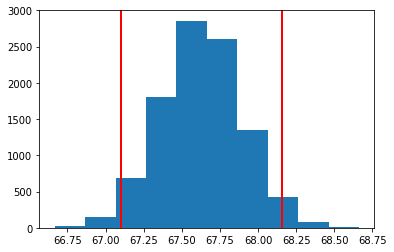

In [4]:
plt.hist(means);
plt.axvline(x=low, color='r', linewidth=2);
plt.axvline(x=high, color='r', linewidth=2);

In the above case, our interval was entirely below 70, which would suggest the null (the population mean is less than 70) is actually true.

### Simulating from the Null

- assume that the null is true.
- we know what the smapling distribution would look like if we were to simulate from the closest value under the null to the alternative. 

- use std of the sampling distribution to simulate what the distribution would look like if it came from the Null hypothesis. Let us simulate from a normal distribution




In [5]:
print("The standard deviation of our sampling distribution is {}".format(np.std(means)))

The standard deviation of our sampling distribution is 0.26582463905559006


We know that if the std came from our hypothesized Null, what it wouldlook like by the central limit theoren. With a sample size of 150, the mean should follow a normal distribution. sampling distribution for the mean is
$$
\frac{\sigma}{\sqrt{n}}
$$

In [6]:
null_vals = np.random.normal(70, np.std(means), 10000)

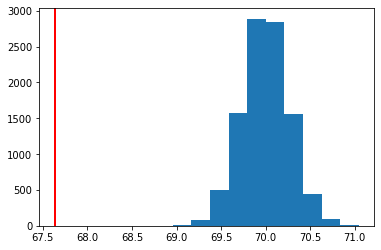

In [10]:
plt.hist(null_vals);
plt.axvline(sample_df['height'].mean(),color='r', linewidth=2);

each draw represents a possible means for our null hypothesis. So where does the sample mean falls in this distribution?

In [9]:
sample_df['height'].mean()

67.63297688228066

We see that sample mean falls far below this distribution from the norm. If it were to have fallen close to the center value of 70, it would be a value that we expect from our null hypothesis, therefore we think ull hypothesis is true. 

At the end of the video, it is suggested that we do not believe that our null hypothesis value of 70 would be supported, which is true. However, since our null is that the population mean is less than or equal to 70, we do have evidence to support this claim with our sample mean of approximately 67. This would suggest not rejecting our one-sided null alternative.

If we had a null where we asked if the population mean was equal to 70, then we would reject this null in favor of an alternative that suggested the population mean was actually different from 70. You will see more of this idea in the upcoming content.

**More problems**

`1`. If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be? 

\begin{align}
H_{0}&: \mu_{0}-\mu_{1} \neq 0\\
H_{1}&: \mu_{0} - \mu_{1} = 0
\end{align}

**$\mu_{0}$ and $\mu_{1}$** are the population mean values for coffee drinkers and non-coffee drinkers, respectivley. **Since there is no directional component associated with this statement, a not equal to seems most reasonable.**

`2`.  If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative hypotheses be?

\begin{align}
H_{0}&: \mu_{0}-\mu_{1} \geq 0\\
H_{1}&: \mu_{0} - \mu_{1} < 0
\end{align}


`3`. For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample. You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means. Use the results of your sampling distribution, to answer the third quiz question below


In [11]:
sample_df.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [15]:
boot_drink_coffee, boot_not_drink_coffee, boot_mean = [],[],[]


for _ in range(10000):
    bootsample = sample_df.sample(150, replace = True)
    drinkscoffee = bootsample[bootsample['drinks_coffee'] == True]['height'].mean()
    non_drinkscoffee = bootsample[bootsample['drinks_coffee'] == False]['height'].mean()
    
    mean_dc = boot_drink_coffee.append(drinkscoffee)
    mean_ndc = boot_not_drink_coffee.append(non_drinkscoffee)
    diff_mean = boot_mean.append(drinkscoffee - non_drinkscoffee)

In [16]:
np.std(boot_mean)

0.5807216792585257

In [17]:
np.std(boot_not_drink_coffee), np.std(boot_drink_coffee)

(0.5029973238017118, 0.28897847421060746)

In [21]:
dc = sample_df[sample_df['drinks_coffee'] == True]['height'].mean()
n_dc = sample_df[sample_df['drinks_coffee'] == False]['height'].mean()
diff = dc-n_dc
diff

1.1421111003828912

`4.` Now, use your observed sampling distribution for the difference in means and the docs to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in sample_data. Use your solutions to answer the last questions in the quiz below.

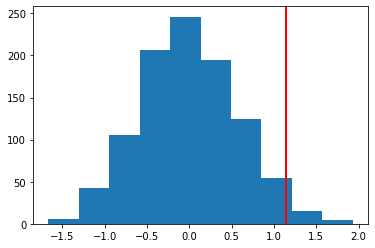

In [20]:
s = np.random.normal(0, np.std(boot_mean), 1000)
plt.hist(s);
plt.axvline(diff,color='r', linewidth=2);

If our statistics is in the bulk of the distribution, then it suggest that it is from the null hypothesis. If otherwise the statistics is away from the bulk of distribution, then it suggest the null wasnt likely tohave generated our ststuasWe would expect the sampling distribution to be normal by the Central Limit Theorem, and we know the standard deviation of the sampling distribution of the difference in means from the previous question, so we can use this to simulate draws from the sampling distribution under the null hypothesis. If there is truly no difference, then the difference between the means should be zero.

comparing our actual height difference to this distribution tells us the likelihood of our statistics coming from the null.

## P-Value

Conditional probability of the data given the null hypothesis is true.

The definition of a p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true. 

Finding the p-value involves a mix of knowledge of sampling distribution and conditional probability.

If $H_{0}$ is true, what is the probability of obtaining the observed statistics in our data or one more extreme in favour to alternative hypothesis? 

- it is dependent on alternative hypothesis as it determines what is considered to be extreme.

Large p-values suggest we shouldnt move away from null hypothesis.

- Simulate the values of your statistic that are possible from the null. (null_vals - the normal distribution)
- Calculate the value of the statistic you actually obtained in your data. (sample_mean - sample_df['height'].mean())
- Compare your statistic to the values from the null. (null_vals > sample_mean)
- Calculate the proportion of null values that are considered extreme based on your alternative. (null_vals > sample_mean).mean()


Old scenario

$H_0: \mu \leq 70$

$H_1: \mu > 70$

In [22]:
#Find the sample mean
sample_mean = sample_df.height.mean()

In [25]:
#compare statistics to values from the null
sum((null_vals > sample_mean) == True)

10000

In [28]:
#Calculate the P-value
p =  (null_vals > sample_mean).mean()
p

1.0

New scenario

$H_0: \mu \geq 70$

$H_1: \mu < 70$

So we look at shaded region to the left of our statistics.

In [29]:
#compare statistics to values from the null
sum((null_vals < sample_mean) == True)

0

In [30]:
#Calculate the P-value
p =  (null_vals < sample_mean).mean()
p

0.0

reject null hypothesis in favour to laternative

New scenario

$H_0: \mu = 70$

$H_1: \mu \neq 70$

In [31]:
#compare statistics to values from the null
sum((null_vals != sample_mean) == True)

10000

In [33]:
null_mean = 70
(null_vals < sample_mean).mean() + (null_vals > null_mean +(null_mean - sample_mean)).mean()

0.0

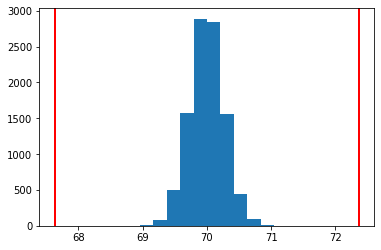

In [34]:
low = sample_mean
high = null_mean + (null_mean - sample_mean)

plt.hist(null_vals);
plt.axvline(low,color='r', linewidth=2)
plt.axvline(high,color='r', linewidth=2);

## Putting it all together

`1.` Consider you have implemented a new program in the office to improve company morale. You measure employee morale for each employee via an assessment before and after the program. You want to see if the program was successful. Use this scenario to complete the matches below.

- Deciding there was no change in morale, but there actually was an increase - Type II error
- Deciding the program increased morale, but it actually didn't - Type I error
- There was no change in the average morale of the company - Null Hypothesis
- The new program on average increased morale - Alternative Hypothesis
- The probability of the observed change in average morale occurring or an average change even more in favor of an increase in morale given there was actually no change in morale - p-value

`2.` Imagine the statistic we compute is the sample mean after the program minus the sample mean before the program. how would the distribution be shaded to obtain p-value?

- If there is no difference in the average morale, shade greater than positive of the observed statistics and below the negative of 
- If the average morale after the program is higher than before the program, shade greater than the observed statistics
- If the average morale after the program is lower than before the program, them shade less than the observed statistics